In [149]:
import pandas as pd
import numpy as np
import glob, os, cv2
from matplotlib import pyplot as plt

In [150]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [151]:
DIRECTORY = "UTKFace/"

In [152]:
# first number before _ in filenames of images are person's age (in 39_1_20170116174525125.jpg.chip.jpg 39 is the age)
# parsing and returning age for each image in directory
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        age, gender, race, _ = filename.split("_")
        return int(age)
    except Exception as e:
        print(filepath)
        return None

In [153]:
files = glob.glob(os.path.join(DIRECTORY, "*.jpg"))
data = list(map(parse_filepath, files))

UTKFace\39_1_20170116174525125.jpg.chip.jpg
UTKFace\61_1_20170109142408075.jpg.chip.jpg
UTKFace\61_1_20170109150557335.jpg.chip.jpg


In [154]:
# making data frame with images and ages
df = pd.DataFrame(data)
df['file'] = files
df.columns = ['age', 'file']
df = df.sort_values(by=['age'])
df = df.dropna()
df.head()

,age,file
2226,1.0,UTKFace\1_1_0_20161219205534526.jpg.chip.jpg
2047,1.0,UTKFace\1_0_3_20161219225723376.jpg.chip.jpg
2048,1.0,UTKFace\1_0_3_20161219225759904.jpg.chip.jpg
2049,1.0,UTKFace\1_0_3_20161219225808112.jpg.chip.jpg
2050,1.0,UTKFace\1_0_3_20161219225811120.jpg.chip.jpg


In [155]:
df.shape

(23705, 2)

<AxesSubplot:>

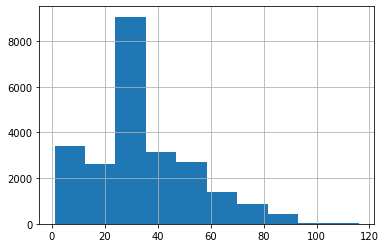

In [156]:
# age distribution
df['age'].hist()

In [157]:
# grouping age in 9 intervals
def class_label(age):
    if 1 <= age <= 2:
        return 0
    elif 3 <= age <= 10:
        return 1
    elif 11 <= age <= 20:
        return 2
    elif 21 <= age <= 27:
        return 3
    elif 28 <= age <= 35:
        return 4
    elif 36 <= age <= 45:
        return 5
    elif 45 <= age <= 53:
        return 6
    elif 54 <= age <= 65:
        return 7
    else:
        return 8


In [158]:
df['target'] = df['age'].map(class_label)

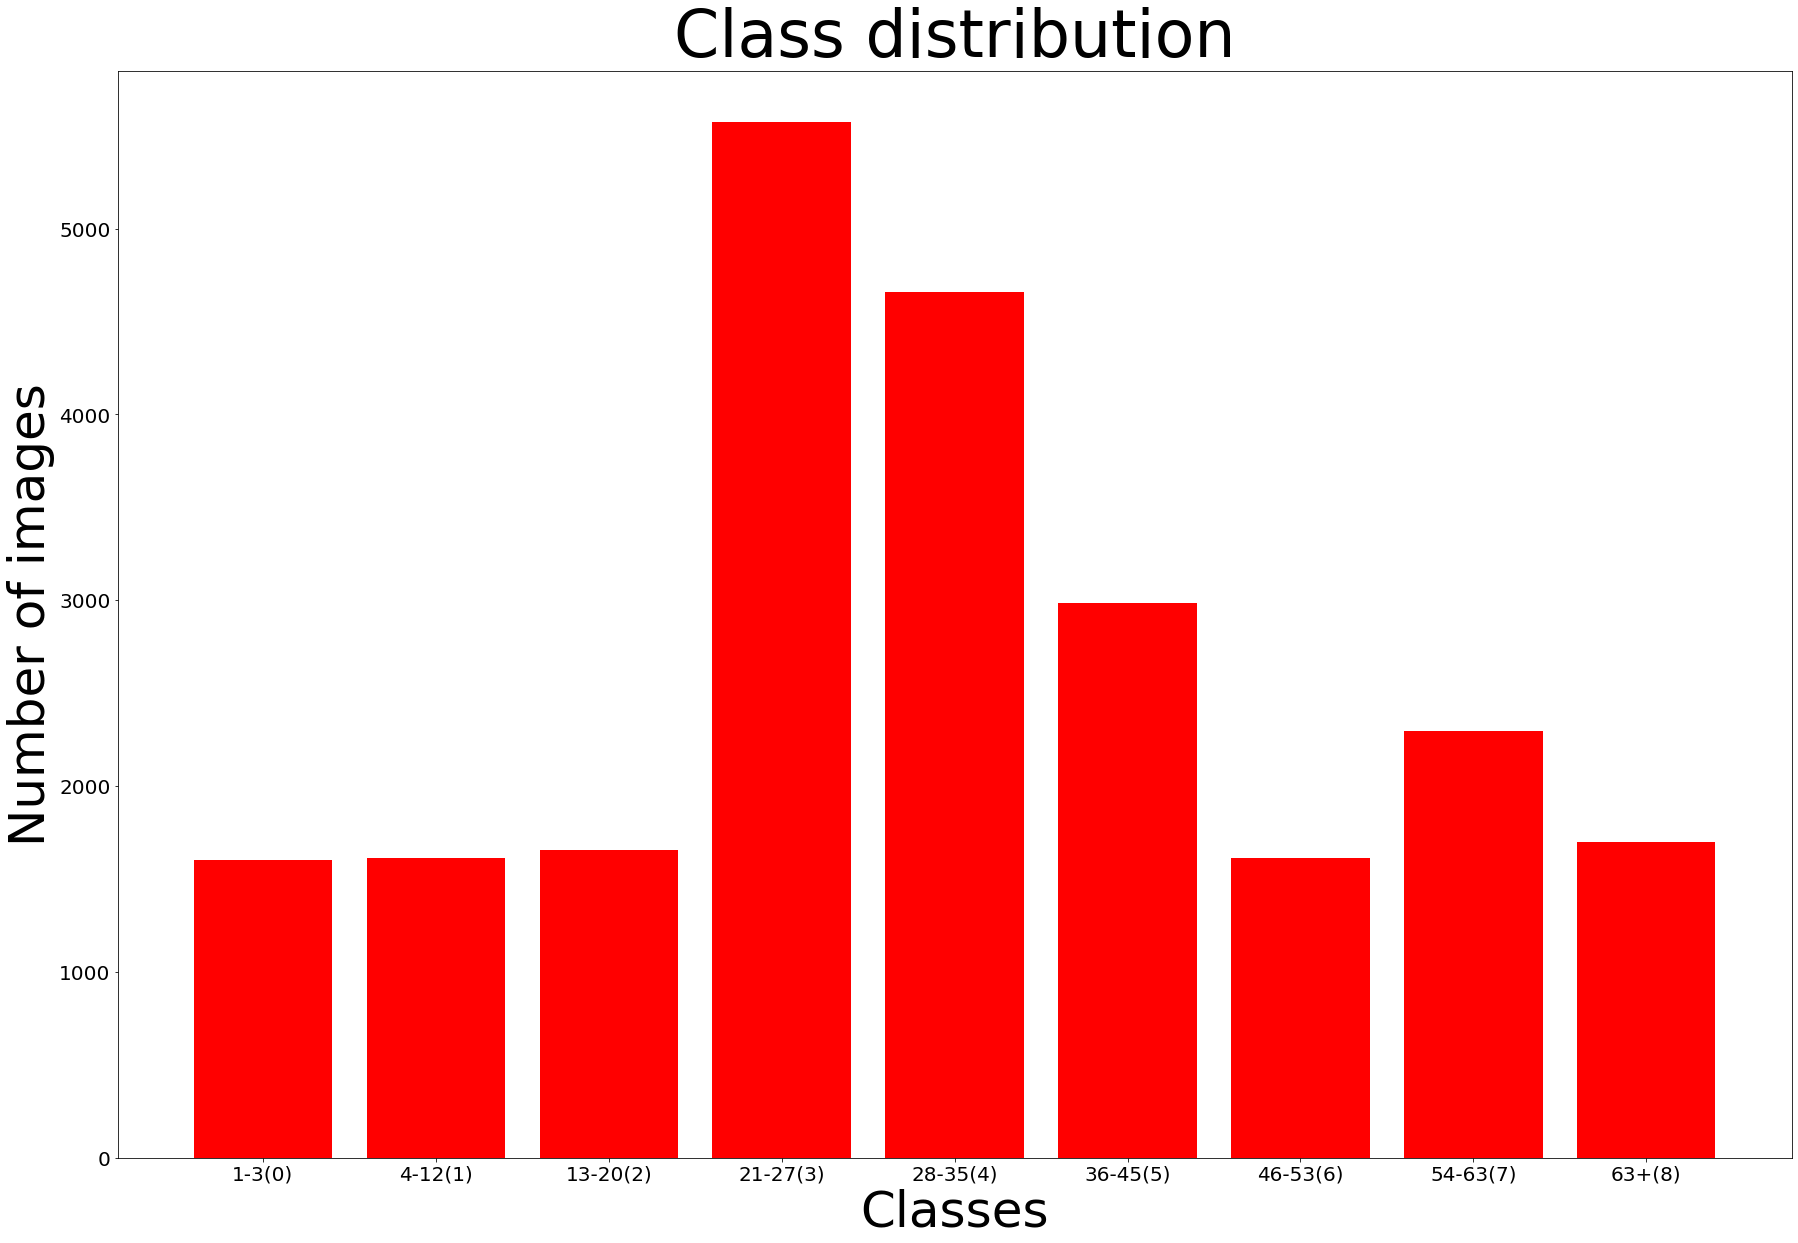

In [159]:
classes_names = ['1-3(0)','4-12(1)','13-20(2)','21-27(3)','28-35(4)','36-45(5)','46-53(6)','54-63(7)','63+(8)']
plt.figure(figsize=(30,20))
plt.title('Class distribution', fontsize=65)
plt.xlabel('Classes', fontsize=50)
plt.ylabel('Number of images', fontsize=50)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.bar(classes_names,np.bincount(df['target']), color = 'r')
plt.show()

In [160]:
# data is not balanced, so we are undersampling by taking 1600 random instances of the most numerous classes
class_3 = df[4878:10449].sample(frac=1)[:1600]
class_4 = df[10451:15107].sample(frac=1)[:1600]
class_5 = df[15108:18094].sample(frac=1)[:1600]
class_7 = df[19710:22006].sample(frac=1)[:1600]

In [161]:
# deleting all instances of the most numerous classes
df = df.drop(df[df['target']==3].index)
df = df.drop(df[df['target']==4].index)
df = df.drop(df[df['target']==5].index)
df = df.drop(df[df['target']==7].index)

In [162]:
# adding 1600 of each
df = pd.concat([df,class_3])
df = pd.concat([df,class_4])
df = pd.concat([df,class_5])
df = pd.concat([df,class_7])

In [163]:
df.shape

(14592, 3)

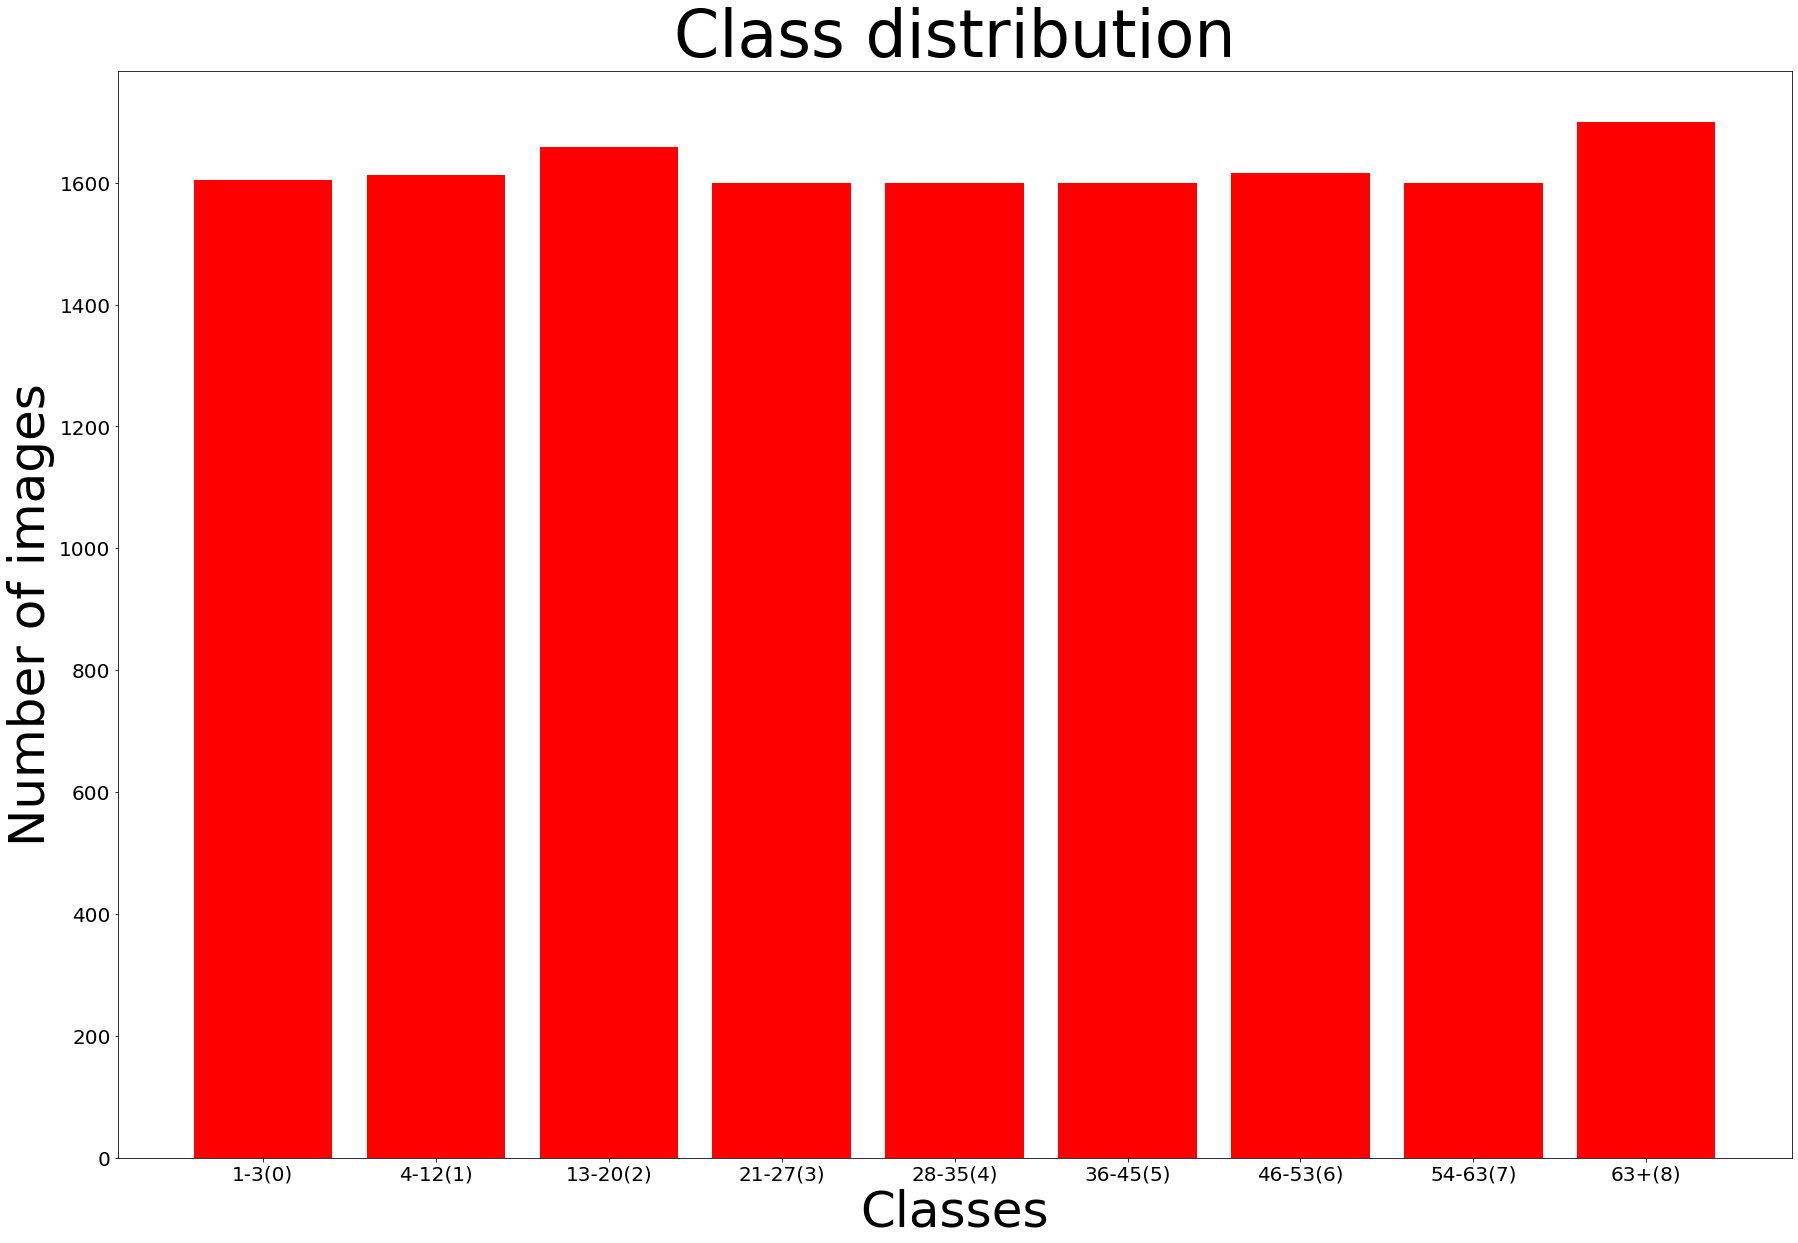

In [164]:
classes_names = ['1-3(0)','4-12(1)','13-20(2)','21-27(3)','28-35(4)','36-45(5)','46-53(6)','54-63(7)','63+(8)']
plt.figure(figsize=(30,20))
plt.title('Class distribution', fontsize=65)
plt.xlabel('Classes', fontsize=50)
plt.ylabel('Number of images', fontsize=50)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.bar(classes_names,np.bincount(df['target']), color = 'r')
plt.show()

In [165]:
X_files = df['file']
y = df['target']
X = []

In [166]:
df.head()

,age,file,target
2226,1.0,UTKFace\1_1_0_20161219205534526.jpg.chip.jpg,0
2047,1.0,UTKFace\1_0_3_20161219225723376.jpg.chip.jpg,0
2048,1.0,UTKFace\1_0_3_20161219225759904.jpg.chip.jpg,0
2049,1.0,UTKFace\1_0_3_20161219225808112.jpg.chip.jpg,0
2050,1.0,UTKFace\1_0_3_20161219225811120.jpg.chip.jpg,0


In [167]:
for img in X_files:
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    X.append(np.array(image))

In [169]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(y)
Y = to_categorical(Y,9)